In [1]:
import pandas as pd
import numpy as np
import time
from langchain_community.embeddings import OllamaEmbeddings


# Load the dataset
data = pd.read_csv('dataset/pokemon.csv')["name"]
words = data.to_list()
words = list(map(str.lower, words))

In [2]:
len(words)

801

In [14]:
embeddings = []
ollama_emb = OllamaEmbeddings(
    model="llama3",
)
# Loop through each Pokémon name with a 2-second timeout
for idx, name in enumerate(words[:100]):
    print(f"Processing index {idx + 1}/{len(words)}: {name}")
    embedding = ollama_emb.embed_query(name)
    embeddings.append(embedding)

    # Add a 2-second delay between each query
    time.sleep(2)

# Convert embeddings into a DataFrame

Processing index 1/801: bulbasaur
Processing index 2/801: ivysaur
Processing index 3/801: venusaur
Processing index 4/801: charmander
Processing index 5/801: charmeleon
Processing index 6/801: charizard
Processing index 7/801: squirtle
Processing index 8/801: wartortle
Processing index 9/801: blastoise
Processing index 10/801: caterpie
Processing index 11/801: metapod
Processing index 12/801: butterfree
Processing index 13/801: weedle
Processing index 14/801: kakuna
Processing index 15/801: beedrill
Processing index 16/801: pidgey
Processing index 17/801: pidgeotto
Processing index 18/801: pidgeot
Processing index 19/801: rattata
Processing index 20/801: raticate
Processing index 21/801: spearow
Processing index 22/801: fearow
Processing index 23/801: ekans
Processing index 24/801: arbok
Processing index 25/801: pikachu
Processing index 26/801: raichu
Processing index 27/801: sandshrew
Processing index 28/801: sandslash
Processing index 29/801: nidoran♀
Processing index 30/801: nidorin

In [15]:
encoded_pokemon = np.array(embeddings)

In [16]:
encoded_pokemon.shape

(100, 4096)

(100, 4096)


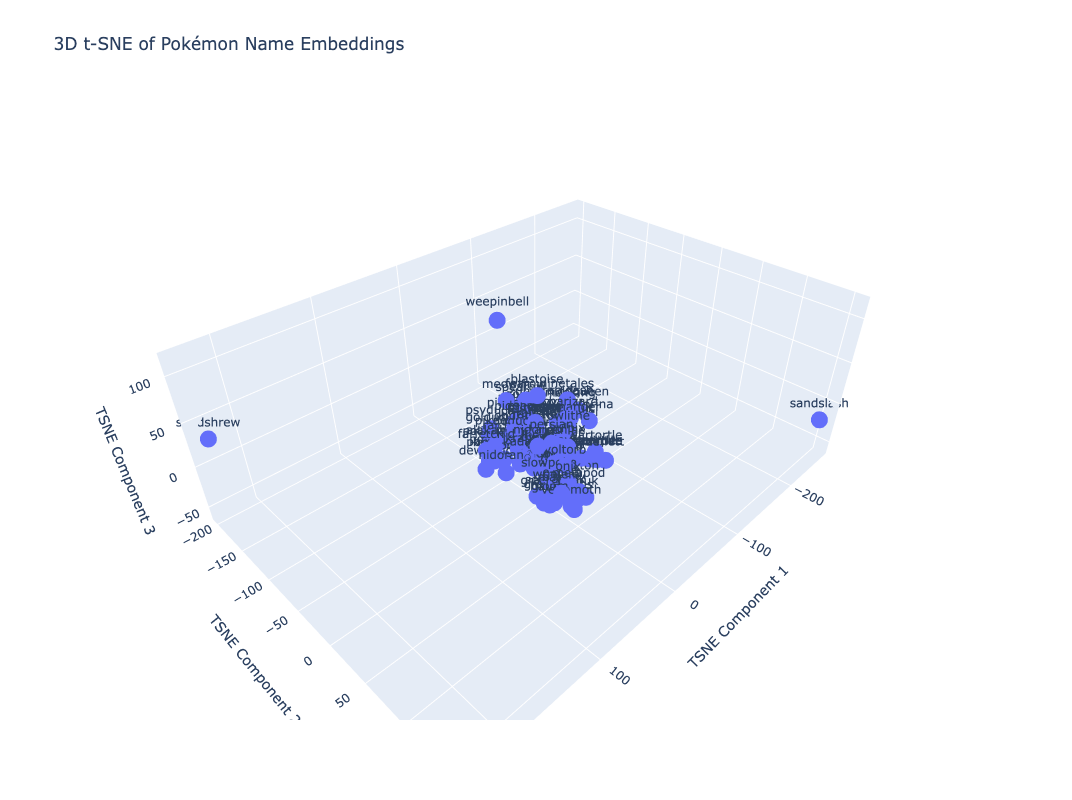

In [19]:
from sklearn.manifold import TSNE

# Dimensionality reduction using t-SNE for 3D visualization
import plotly.express as px

# Flatten the one-hot encoded arrays into a 2D array
flattened_encoded_pokemon = encoded_pokemon.reshape(100, -1)  # Reshape to (number of Pokémon, max_length * number of characters)

# Check the shape of the flattened result
print(flattened_encoded_pokemon.shape)  # Should be (number of words, max_length * number of characters)

# Dimensionality reduction using t-SNE for 3D visualization
tsne = TSNE(n_components=3, perplexity=3, random_state=42)
pokemon_tsne_3d = tsne.fit_transform(flattened_encoded_pokemon)

# Create a DataFrame for Plotly visualization
df = pd.DataFrame(pokemon_tsne_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Pokémon'] = words[:100]  # Add Pokémon names for labeling

# 3D Scatter Plot using Plotly Express
fig = px.scatter_3d(
    df, 
    x='Component 1', 
    y='Component 2', 
    z='Component 3', 
    text='Pokémon',  # Display Pokémon names
    title='3D t-SNE of Pokémon Name Embeddings',
    height=800
)

fig.update_traces(marker_size=10)
fig.update_layout(scene=dict(
    xaxis_title='TSNE Component 1',
    yaxis_title='TSNE Component 2',
    zaxis_title='TSNE Component 3',
))

fig.show()

In [18]:
df.to_csv('pokemon_tsne_data_llama.csv', index=False)